# Advanced Numerical Analysis

## Exercise 2

_For_ $n= 2^k$ _compare the computation time of the eigenvalues of the_ $n\times n$ _matrix_ $A$ _with entries_

$(\textrm{i})\ \ \quad A_{ij} = i+j$  
$(\textrm{ii})\ \quad A_{ij} = i+j^2$  
$(\textrm{iii}) \quad A_{ij} = \sqrt{ij+i+1}$  
$(\textrm{iv})\: \! \quad A_{ij} = -\max(3-|i-j|,0)$  
$(\textrm{v})\ \: \! \quad A_{ij} = -\max(3-|i-j|,0)$ _in sparse representation_

In [21]:
memory = 4 * 2^30; %bytes
maximum = floor(log2(memory / 8) / 2); % = 14
clear time

for k = 1:maximum;
    n = 2^k;
    m = 1:n;
    
    A = m + m';
    tic(); eig(A); time(k, 1) = toc();
    
    A = m + (m.^2)';
    tic(); eig(A); time(k, 2) = toc();

    A = sqrt(m .* m' + m + 1);
    tic(); eig(A); time(k, 3) = toc();

    A = -max(3 - abs(m - m'), 0);
    tic(); eig(A); time(k, 4) = toc();
    
    % from Roman Kostal
    D = sparse(1:n, 1:n,   -3*ones(1, n),   n, n);
    G = sparse(2:n, 1:n-1, -2*ones(1, n-1), n, n);
    F = sparse(3:n, 1:n-2,   -ones(1, n-2), n, n);
    A = D + G + G' + F + F';
    tic(); eigs(A, n); time(k, 5) = toc();
endfor

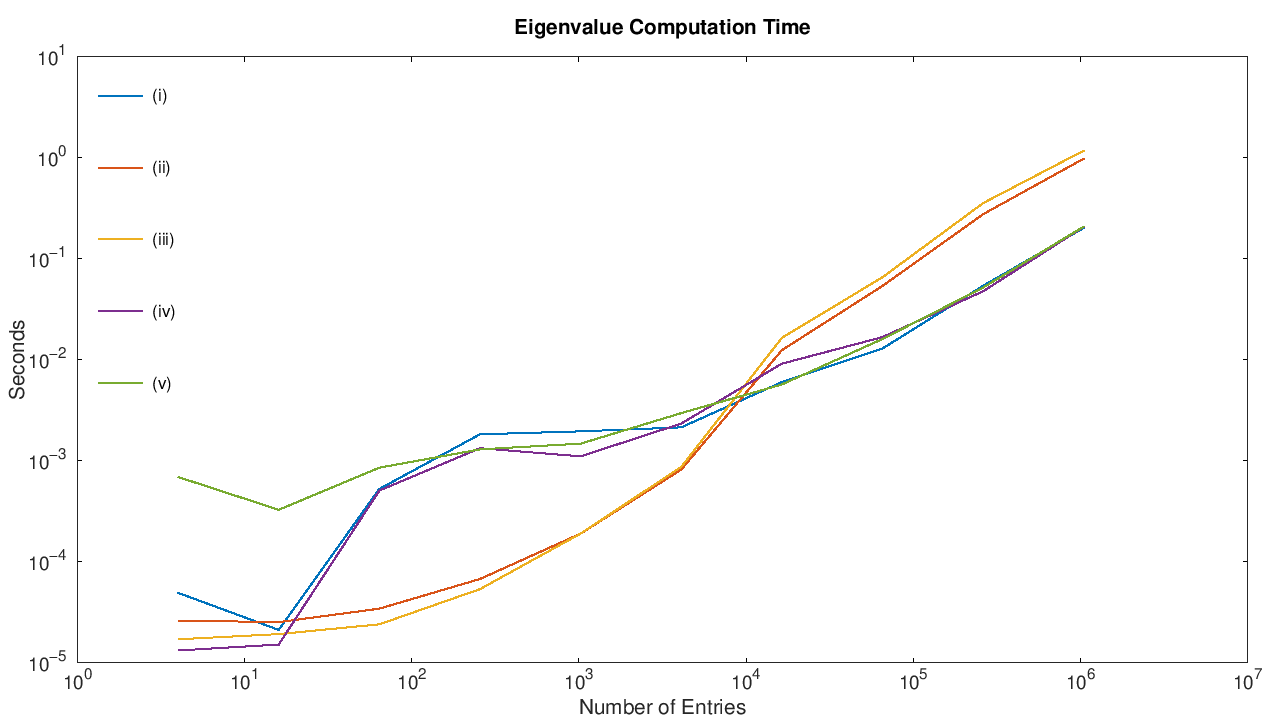

In [22]:
%plot -s 1280,720
x = (2.^[1:maximum]).^2;
plt = loglog(x, time);
set(plt, "linewidth", 4);
title("Eigenvalue Computation Time");
xlabel("Number of Entries");
ylabel("Seconds");
legend({"(i)", "(ii)", "(iii)", "(iv)", "(v)"}, "box", "off", "location", "northwest", "fontsize", 9);

For a small number of entries the measurements might not be very reliable. The trend from around $10^5$ entries onwards may continue because the matrices in $(\textrm{i}), (\textrm{iv})$ and $(\textrm{v})$ are symmetric and eigenvalues from those can be more efficiently computed.